In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report

# Read Data

In [3]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna(subset=['TotalCharges'])

In [9]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

<ipython-input-9-b7bcfbff6166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


In [10]:
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

# Why Churn?

## Churn vs Charges

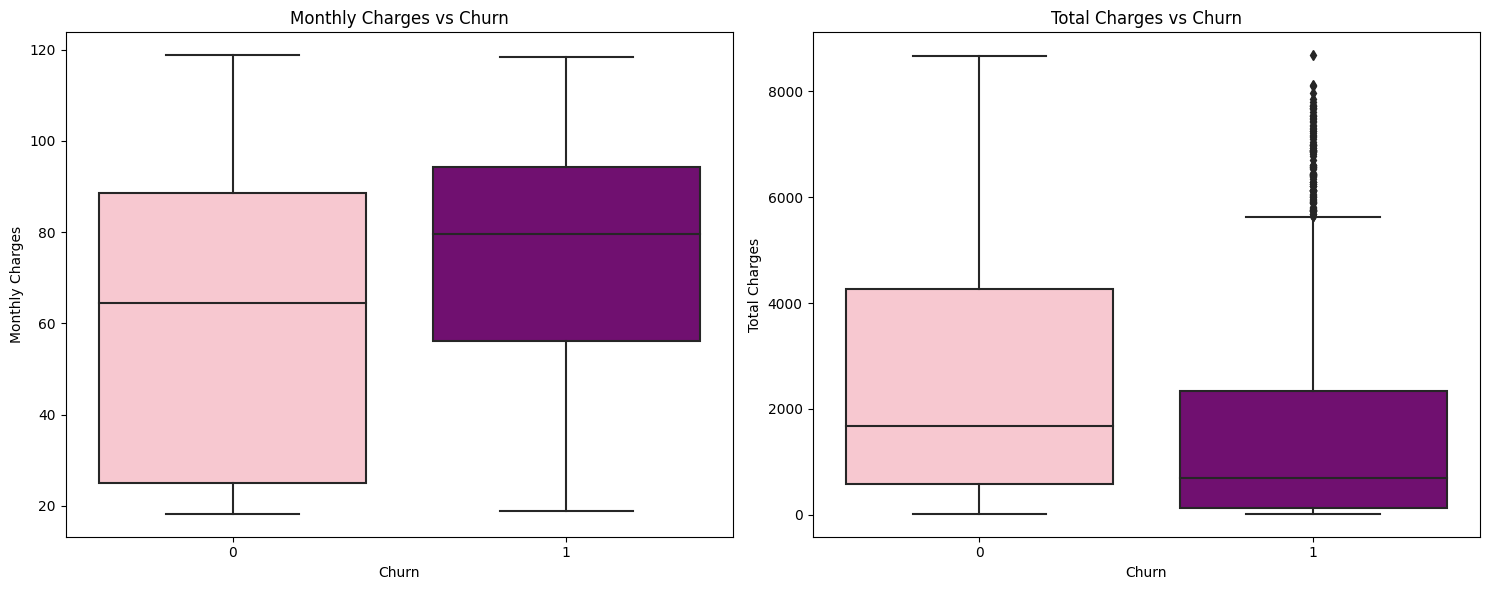

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x=data['Churn'], y=data['MonthlyCharges'], palette=["pink", "purple"], ax=axes[0])
axes[0].set_title('Monthly Charges vs Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Monthly Charges')


sns.boxplot(x=data['Churn'], y=data['TotalCharges'], palette=["pink", "purple"], ax=axes[1])
axes[1].set_title('Total Charges vs Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Total Charges')

plt.tight_layout()
plt.show()


## Churn Rate by Service

In [12]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

total_churned = data[data['Churn'] == 1].shape[0]

service_churn_counts = {}

for service in service_cols:
    churn_counts = data[data['Churn'] == 1][service].value_counts()
    service_churn_counts[service] = (churn_counts / total_churned) * 100 

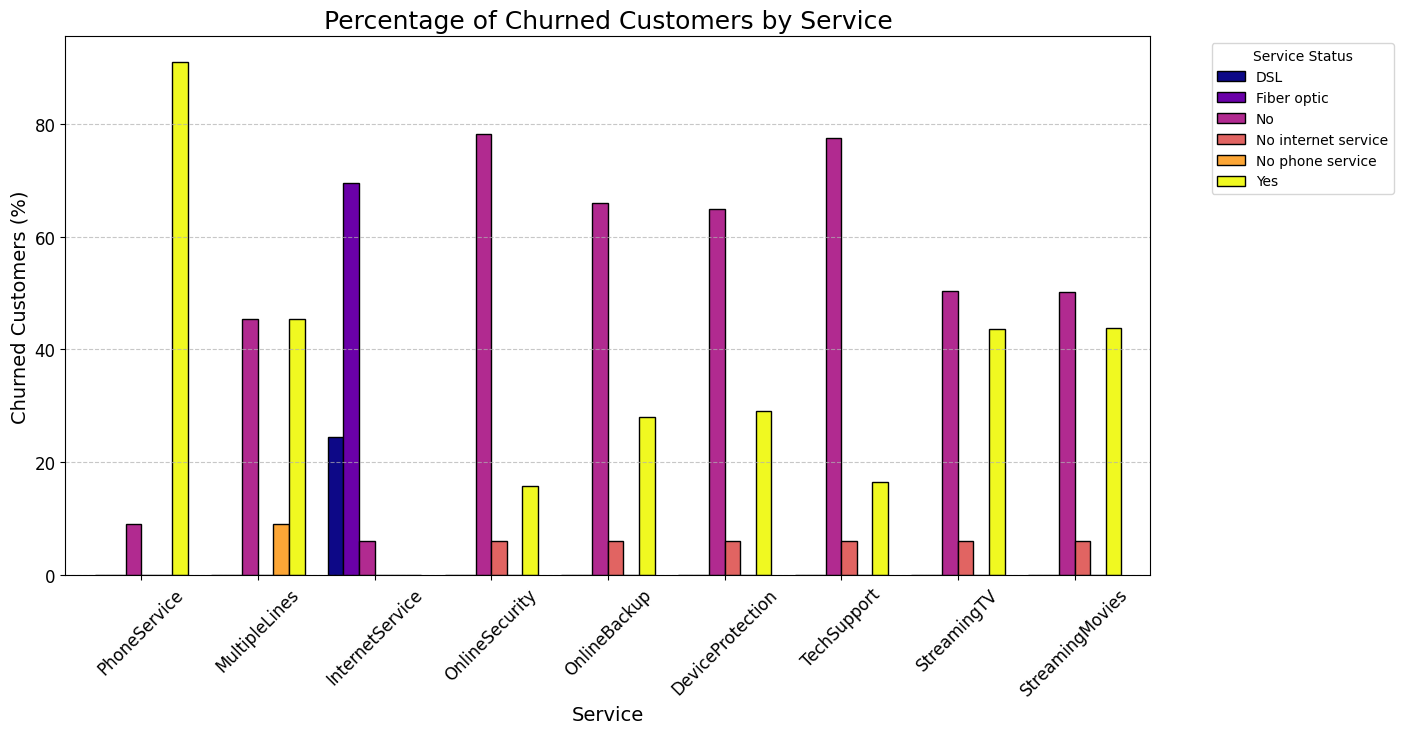

In [13]:
service_churn_df = pd.DataFrame(service_churn_counts)

service_churn_df.T.plot(kind='bar', figsize=(14, 7), colormap='plasma', edgecolor='black', width=0.8)

plt.title('Percentage of Churned Customers by Service', fontsize=18)
plt.ylabel('Churned Customers (%)', fontsize=14)
plt.xlabel('Service', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Service Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [14]:
service_churn_counts

{'PhoneService': PhoneService
 Yes    90.904227
 No      9.095773
 Name: count, dtype: float64,
 'MultipleLines': MultipleLines
 Yes                 45.478866
 No                  45.425361
 No phone service     9.095773
 Name: count, dtype: float64,
 'InternetService': InternetService
 Fiber optic    69.395399
 DSL            24.558587
 No              6.046014
 Name: count, dtype: float64,
 'OnlineSecurity': OnlineSecurity
 No                     78.170144
 Yes                    15.783842
 No internet service     6.046014
 Name: count, dtype: float64,
 'OnlineBackup': OnlineBackup
 No                     65.971108
 Yes                    27.982879
 No internet service     6.046014
 Name: count, dtype: float64,
 'DeviceProtection': DeviceProtection
 No                     64.794007
 Yes                    29.159979
 No internet service     6.046014
 Name: count, dtype: float64,
 'TechSupport': TechSupport
 No                     77.367576
 Yes                    16.586410
 No interne

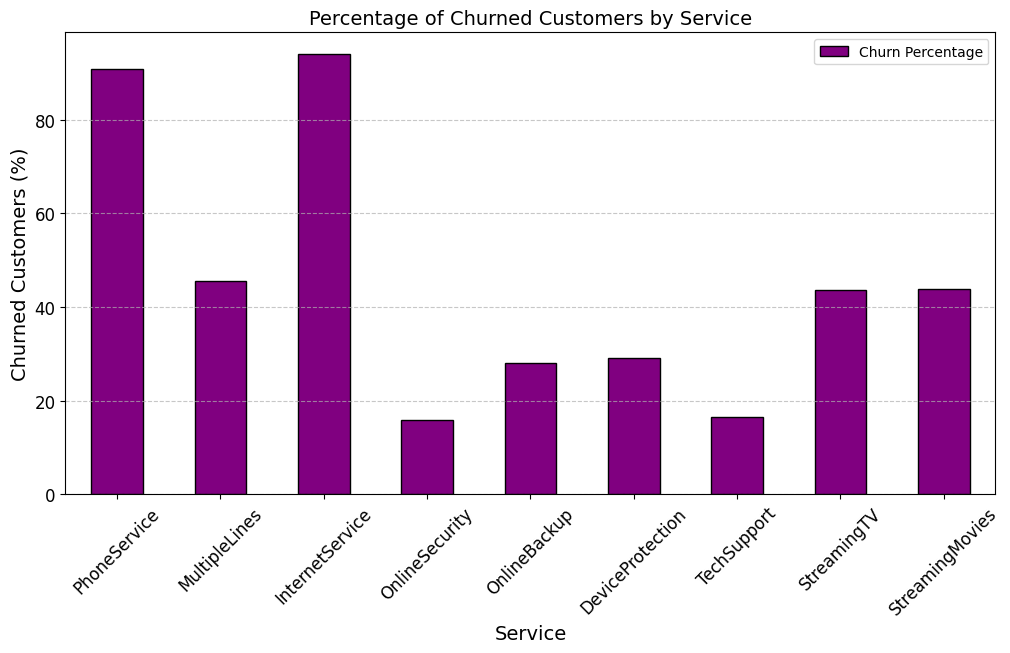

In [15]:
service_churn_countss = {
    service: (data[(data['Churn'] == 1) & (data[service] != 'No') & (data[service] != 'No phone service') & (data[service] != 'No internet service') ].shape[0] / total_churned) * 100
    for service in service_cols
}

service_churn_df = pd.DataFrame.from_dict(service_churn_countss, orient='index', columns=['Churn Percentage'])


# Plot
ax = service_churn_df.plot(kind='bar', figsize=(12, 6), color='purple', edgecolor='black')
plt.title('Percentage of Churned Customers by Service', fontsize=14)
plt.ylabel('Churned Customers (%)', fontsize=14)
plt.xlabel('Service', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


In [16]:
service_churn_countss

{'PhoneService': 90.90422685928304,
 'MultipleLines': 45.4788657035848,
 'InternetService': 93.95398608881756,
 'OnlineSecurity': 15.783841626538257,
 'OnlineBackup': 27.9828785446763,
 'DeviceProtection': 29.159978598180846,
 'TechSupport': 16.586409844836812,
 'StreamingTV': 43.55270197966827,
 'StreamingMovies': 43.76672017121455}

## Churn Vs PaymentMethod

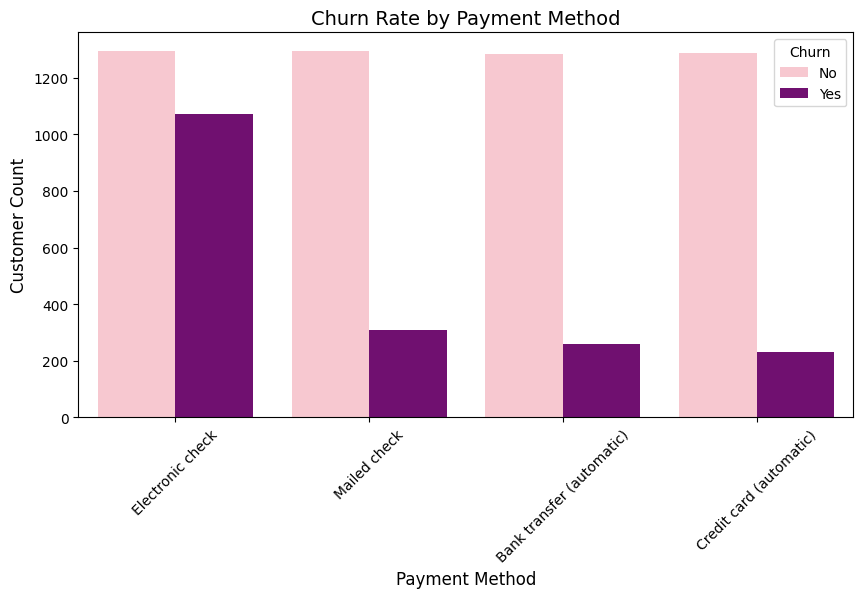

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=data, x='PaymentMethod', hue='Churn', palette=['pink', 'purple'])

plt.title('Churn Rate by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


## Churn vs contract

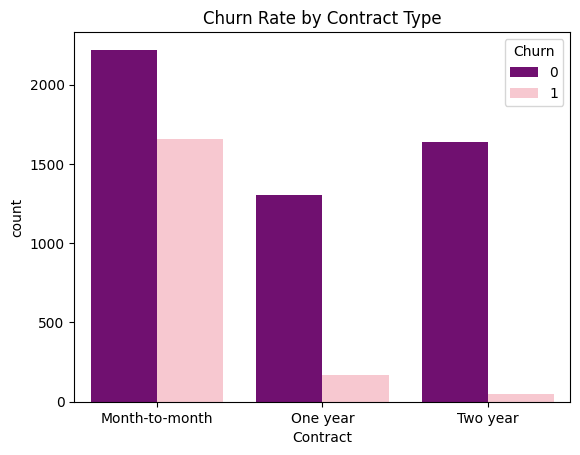

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
sns.countplot(data=data, x="Contract", hue="Churn" , palette=  ["purple", "pink"] )
plt.title("Churn Rate by Contract Type")
plt.show()



In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# handle outliers 

In [20]:
Q1 = data['TotalCharges'].quantile(0.25)
Q3 = data['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['TotalCharges'] >= lower_bound) & (data['TotalCharges'] <= upper_bound)]


# Feature Selection 

In [21]:
data = data.drop(columns=['customerID'])

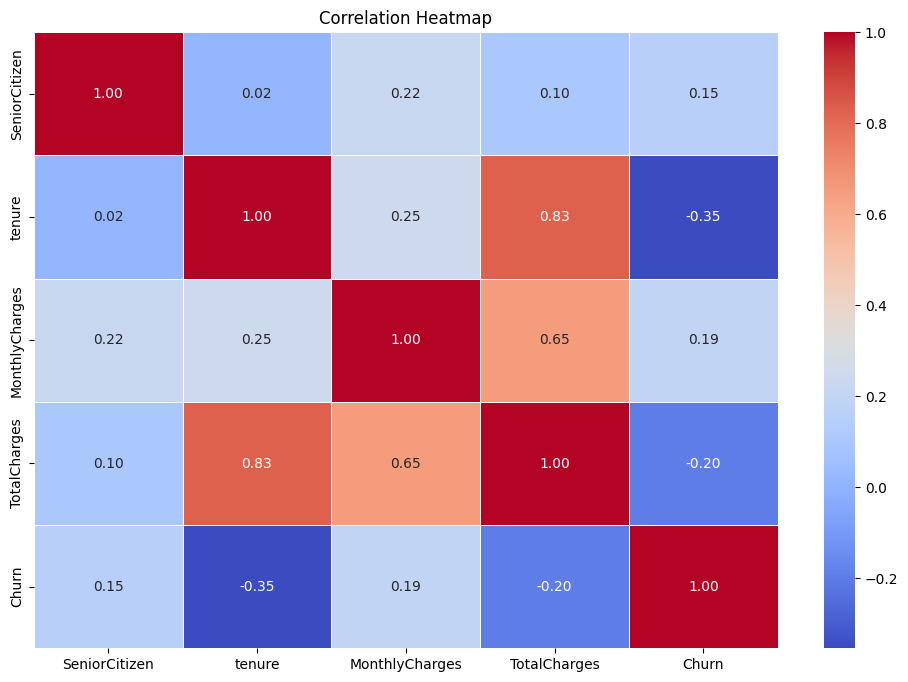

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

correlation_threshold = 0.05
selected_features = correlation_matrix[abs(correlation_matrix["Churn"]) > correlation_threshold].index




# Data Encoding

In [23]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_features = encoder.fit_transform(data[categorical_cols])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

encoded_df.index = data.index
data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)



In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   float64
 6   Partner_Yes                            7032 non-null   float64
 7   Dependents_Yes                         7032 non-null   float64
 8   PhoneService_Yes                       7032 non-null   float64
 9   MultipleLines_No phone service         7032 non-null   float64
 10  MultipleLines_Yes                      7032 non-null   float64
 11  InternetS

In [25]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Scaling Data

In [26]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [27]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0.064303,-0.260878,-0.173740,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,-1.239504,-0.363923,-0.959649,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,0.512486,-0.747850,-0.195248,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,-1.239504,0.196178,-0.940457,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   float64
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   float64
 6   Partner_Yes                            7032 non-null   float64
 7   Dependents_Yes                         7032 non-null   float64
 8   PhoneService_Yes                       7032 non-null   float64
 9   MultipleLines_No phone service         7032 non-null   float64
 10  MultipleLines_Yes                      7032 non-null   float64
 11  InternetS

# Data Impalance

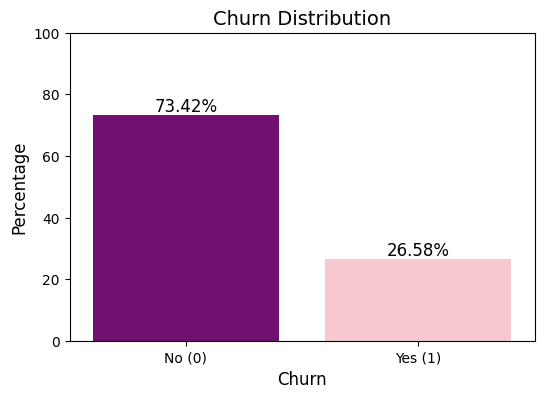

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = data['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['purple', 'pink'])

plt.title('Churn Distribution', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0,1], ['No (0)', 'Yes (1)'])  
plt.ylim(0, 100)


for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()


In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter


X = data.drop(columns=['Churn'])  
y = data['Churn']  


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print( Counter(y))
print( Counter(y_resampled))


Counter({0: 5163, 1: 1869})
Counter({0: 5163, 1: 5163})


# Split Data 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model1 = LogisticRegression(C=0.1 ,max_iter=1000, random_state=42)


model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)


accuracy_log = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_log:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7793

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1037
           1       0.77      0.80      0.78      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066


Confusion Matrix:
 [[783 254]
 [202 827]]


# Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_random = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_random:.4f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8461
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1037
           1       0.85      0.85      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



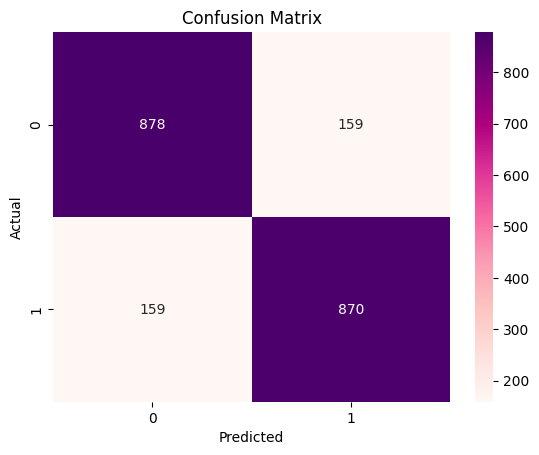

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="RdPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Fine-Tuning In RandomForest

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500], 
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None]  
}


random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42
)

random_search.fit(X_train, y_train)

print(" Best:", random_search.best_params_)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


 Best: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Accuracy: 0.8470474346563408
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1037
           1       0.84      0.85      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



# SVM Model

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm:.4f}")
print(report)


Accuracy: 0.8025
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1037
           1       0.79      0.83      0.81      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



# Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier( max_depth=10, random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


accuracy_Tree = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_Tree:.4f}")
print(report)


Accuracy: 0.7967
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1037
           1       0.79      0.81      0.80      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



# Knn Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


knn = KNeighborsClassifier(n_neighbors=1)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.8219
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1037
           1       0.78      0.90      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.83      0.82      0.82      2066
weighted avg       0.83      0.82      0.82      2066



# DL Models

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


## Model 1

In [40]:
# Building the Neural Network Model
model = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7453 - loss: 0.5209 - val_accuracy: 0.7652 - val_loss: 0.4703
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7766 - loss: 0.4655 - val_accuracy: 0.7764 - val_loss: 0.4653
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4447 - val_accuracy: 0.7851 - val_loss: 0.4586
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4340 - val_accuracy: 0.7890 - val_loss: 0.4443
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4222 - val_accuracy: 0.7870 - val_loss: 0.4507
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4263 - val_accuracy: 0.7933 - val_loss: 0.4365
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8185 - loss: 0.4049 - val_accuracy: 0.8069 - val_loss: 0.4325
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.3958 - val_accuracy: 0.

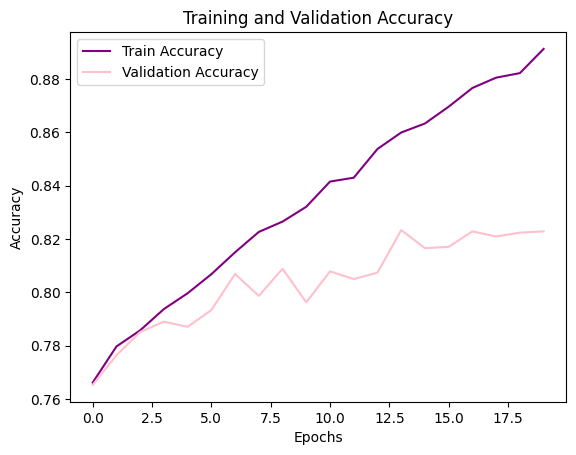

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', color='purple')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='pink')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


## Model 2

In [42]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Building the Neural Network Model
model = keras.Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=AdamW(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history1 = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
test_loss1, test_acc1 = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


517/517 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7505 - loss: 0.5207 - val_accuracy: 0.7657 - val_loss: 0.4738
Epoch 2/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7720 - loss: 0.4783 - val_accuracy: 0.7759 - val_loss: 0.4643
Epoch 3/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7823 - loss: 0.4593 - val_accuracy: 0.7798 - val_loss: 0.4636
Epoch 4/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.4536 - val_accuracy: 0.7890 - val_loss: 0.4569
Epoch 5/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7921 - loss: 0.4456 - val_accuracy: 0.7836 - val_loss: 0.4735
Epoch 6/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7922 - loss: 0.4405 - val_accuracy: 0.7909 - val_loss: 0.4518
Epoch 7/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.4296 - val_accuracy: 0.7870 - val_loss: 0.4487
Epoch 8/50
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8022 - loss: 0.4251 - val_accuracy: 0.7962 - val_

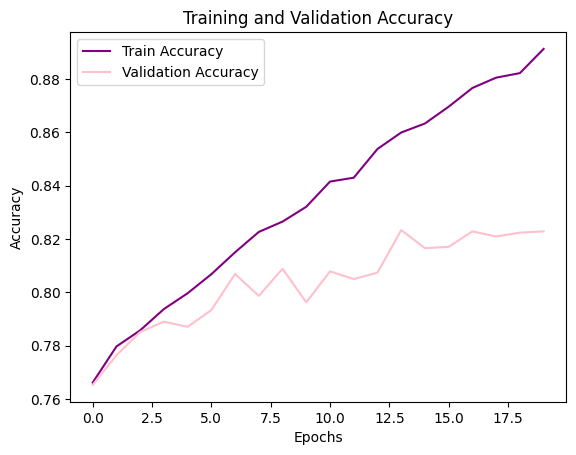

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', color='purple')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='pink')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


## Model 3

In [44]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(128, 64, 32),  
                      activation='relu',                 
                      solver='adam',                  
                      max_iter=200,                     
                      random_state=42)


model.fit(X_train, y_train)


accuracy_dl3 = model.score(X_test, y_test)
print(f"Accuracy: {accuracy_dl3:.4f}")


Accuracy: 0.8374


# visualize the accuracy for models

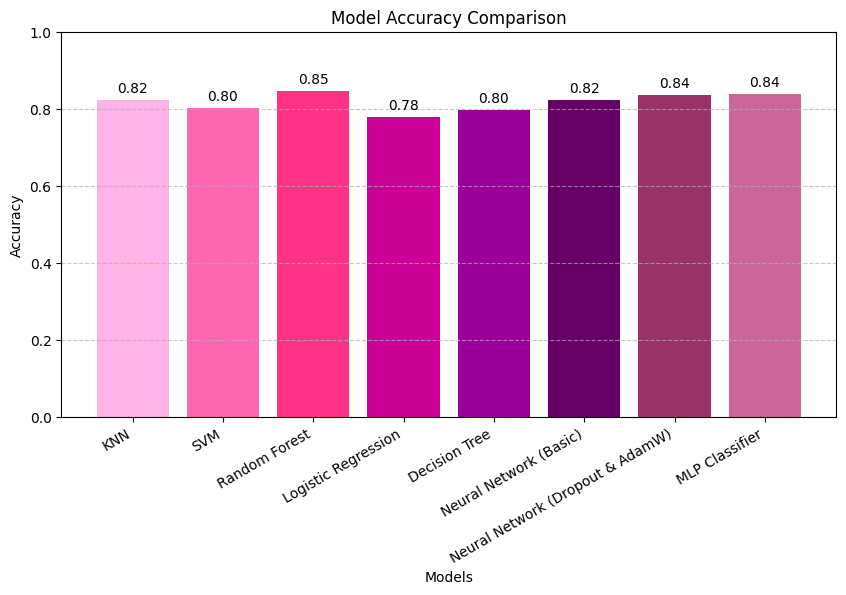

In [45]:
import matplotlib.pyplot as plt

# Storing accuracies of all models
model_accuracies = {
    "KNN": accuracy_knn,
    "SVM": accuracy_svm,
    "Random Forest": accuracy_random,
    "Logistic Regression": accuracy_log,
    "Decision Tree": accuracy_Tree,
    "Neural Network (Basic)": test_acc,
    "Neural Network (Dropout & AdamW)": test_acc1,
    "MLP Classifier": accuracy_dl3
}


colors = [
    "#ffb3e6",  # Light pink
    "#ff66b2",  # Medium pink
    "#ff3385",  # Dark pink
    "#cc0099",  # Deep pink-purple
    "#990099",  # Purple
    "#660066",  # Dark purple
    "#993366",  # Rose
    "#cc6699"   # Muted pink
]


plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=colors)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30, ha="right")  
plt.ylim(0, 1) 
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show accuracy values on bars
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.show()
